In [5]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**IMPORT DATA**

In [ ]:
#reading the csv file in pandas dataframe and skipping first two rows as these were titles

In [6]:
df1=pd.read_csv(r"Downloads/bank_marketing_updated_v1.csv",skiprows =2)

In [9]:
df1.head()

customerid   age  salary  balance  marital                  jobedu  \
0           1  58.0  100000     2143  married     management,tertiary   
1           2  44.0   60000       29   single    technician,secondary   
2           3  33.0  120000        2  married  entrepreneur,secondary   
3           4  47.0   20000     1506  married     blue-collar,unknown   
4           5  33.0       0        1   single         unknown,unknown   

  targeted default housing loan  contact  day      month duration  campaign  \
0      yes      no     yes   no  unknown    5  may, 2017  261 sec         1   
1      yes      no     yes   no  unknown    5  may, 2017  151 sec         1   
2      yes      no     yes  yes  unknown    5  may, 2017   76 sec         1   
3       no      no     yes   no  unknown    5  may, 2017   92 sec         1   
4       no      no      no   no  unknown    5  may, 2017  198 sec         1   

   pdays  previous poutcome response  
0     -1         0  unknown       no  
1     -1         0  unknown       no  
2     -1         0  unknown       no  
3     -1         0  unknown       no  
4     -1         0  unknown       no

**DATA CLEANING AND PREPARATION**

Check for missing values

<Axes: >

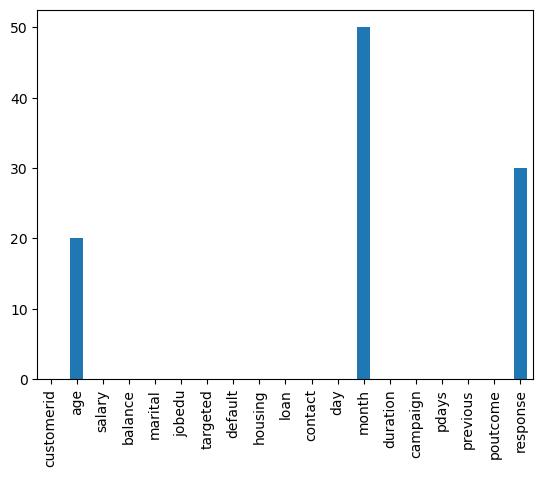

In [10]:
df1.isna().sum().plot(kind='bar')

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45211 non-null  int64  
 1   age         45191 non-null  float64
 2   salary      45211 non-null  int64  
 3   balance     45211 non-null  int64  
 4   marital     45211 non-null  object 
 5   jobedu      45211 non-null  object 
 6   targeted    45211 non-null  object 
 7   default     45211 non-null  object 
 8   housing     45211 non-null  object 
 9   loan        45211 non-null  object 
 10  contact     45211 non-null  object 
 11  day         45211 non-null  int64  
 12  month       45161 non-null  object 
 13  duration    45211 non-null  object 
 14  campaign    45211 non-null  int64  
 15  pdays       45211 non-null  int64  
 16  previous    45211 non-null  int64  
 17  poutcome    45211 non-null  object 
 18  response    45181 non-null  object 
dtypes: float64(1), int64(7), 

In [12]:
null_counts = df1.isnull().sum()

In [13]:
null_counts

customerid     0
age           20
salary         0
balance        0
marital        0
jobedu         0
targeted       0
default        0
housing        0
loan           0
contact        0
day            0
month         50
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
response      30
dtype: int64

Check for duplicacy in customerid

In [27]:
unique_count = df1['customerid'].nunique()

In [28]:
unique_count

45211

checking numerical column to Derive summary statistics (mean, median, standard deviation) for same columns.

In [81]:
df1_num=df1.select_dtypes(np.number)

In [30]:
df1_num

customerid   age  salary  balance  day  campaign  pdays  previous
0               1  58.0  100000     2143    5         1     -1         0
1               2  44.0   60000       29    5         1     -1         0
2               3  33.0  120000        2    5         1     -1         0
3               4  47.0   20000     1506    5         1     -1         0
4               5  33.0       0        1    5         1     -1         0
...           ...   ...     ...      ...  ...       ...    ...       ...
45206       45207  51.0   60000      825   17         3     -1         0
45207       45208  71.0   55000     1729   17         2     -1         0
45208       45209  72.0   55000     5715   17         5    184         3
45209       45210  57.0   20000      668   17         4     -1         0
45210       45211  37.0  120000     2971   17         2    188        11

[45211 rows x 8 columns]

In [87]:
df1_num.isna().sum()

customerid     0
age           20
salary         0
balance        0
day            0
campaign       0
pdays          0
previous       0
dtype: int64

In [35]:
df1_num.describe()
#50% is the median

customerid           age         salary        balance           day  \
count  45211.000000  45191.000000   45211.000000   45211.000000  45211.000000   
mean   22606.000000     40.935651   57006.171065    1362.272058     15.806419   
std    13051.435847     10.619198   32085.718415    3044.765829      8.322476   
min        1.000000     18.000000       0.000000   -8019.000000      1.000000   
25%    11303.500000     33.000000   20000.000000      72.000000      8.000000   
50%    22606.000000     39.000000   60000.000000     448.000000     16.000000   
75%    33908.500000     48.000000   70000.000000    1428.000000     21.000000   
max    45211.000000     95.000000  120000.000000  102127.000000     31.000000   

           campaign         pdays      previous  
count  45211.000000  45211.000000  45211.000000  
mean       2.763841     40.197828      0.580323  
std        3.098021    100.128746      2.303441  
min        1.000000     -1.000000      0.000000  
25%        1.000000     -1.000000      0.000000  
50%        2.000000     -1.000000      0.000000  
75%        3.000000     -1.000000      0.000000  
max       63.000000    871.000000    275.000000

#distribution of the target variable, indicating responses to the term deposit campaign

In [136]:
df1['response'].isnull().sum()


30

#Since the response has null values were less than 1%.we can remove these rows.


In [7]:
df3=df1.dropna()

making a copy of df3

In [22]:
df3_c =df1.dropna()

In [40]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45111 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   customerid  45111 non-null  int64  
 1   age         45111 non-null  float64
 2   salary      45111 non-null  int64  
 3   balance     45111 non-null  int64  
 4   marital     45111 non-null  object 
 5   jobedu      45111 non-null  object 
 6   targeted    45111 non-null  object 
 7   default     45111 non-null  object 
 8   housing     45111 non-null  object 
 9   loan        45111 non-null  object 
 10  contact     45111 non-null  object 
 11  day         45111 non-null  int64  
 12  month       45111 non-null  object 
 13  duration    45111 non-null  object 
 14  campaign    45111 non-null  int64  
 15  pdays       45111 non-null  int64  
 16  previous    45111 non-null  int64  
 17  poutcome    45111 non-null  object 
 18  response    45111 non-null  object 
dtypes: float64(1), int64(7), objec

**Derive summary statistics (mean, median, standard deviation) for relevant columns.**

In [42]:
df3.describe()
#50% is the median

customerid           age         salary        balance           day  \
count  45111.000000  45111.000000   45111.000000   45111.000000  45111.000000   
mean   22610.660349     40.938352   57005.785729    1362.539647     15.808118   
std    13048.080128     10.619601   32090.324851    3046.016714      8.323389   
min        1.000000     18.000000       0.000000   -8019.000000      1.000000   
25%    11312.500000     33.000000   20000.000000      72.000000      8.000000   
50%    22613.000000     39.000000   60000.000000     448.000000     16.000000   
75%    33908.500000     48.000000   70000.000000    1428.000000     21.000000   
max    45211.000000     95.000000  120000.000000  102127.000000     31.000000   

           campaign         pdays      previous  
count  45111.000000  45111.000000  45111.000000  
mean       2.762541     40.193323      0.580391  
std        3.093698    100.094574      2.304710  
min        1.000000     -1.000000      0.000000  
25%        1.000000     -1.000000      0.000000  
50%        2.000000     -1.000000      0.000000  
75%        3.000000     -1.000000      0.000000  
max       63.000000    871.000000    275.000000

**Distribution of the target variable**

Text(0, 0.5, 'Count')

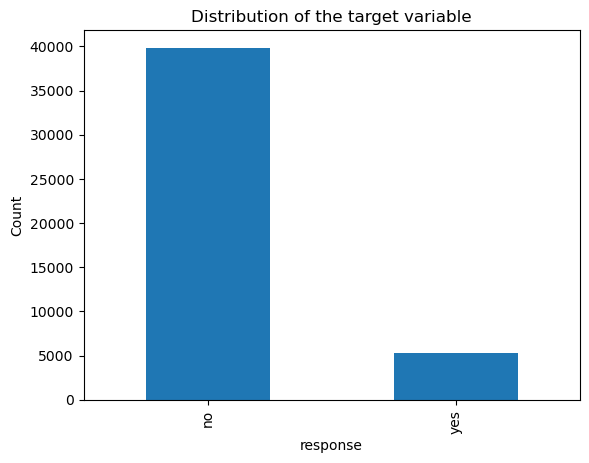

In [9]:
counts = df3['response'].value_counts()
counts.plot(kind='bar')

# Add title and labels
plt.title('Distribution of the target variable')
plt.xlabel('response')
plt.ylabel('Count')

In [74]:
counts = df3['response'].value_counts()

Text(0, 0.5, 'Count')

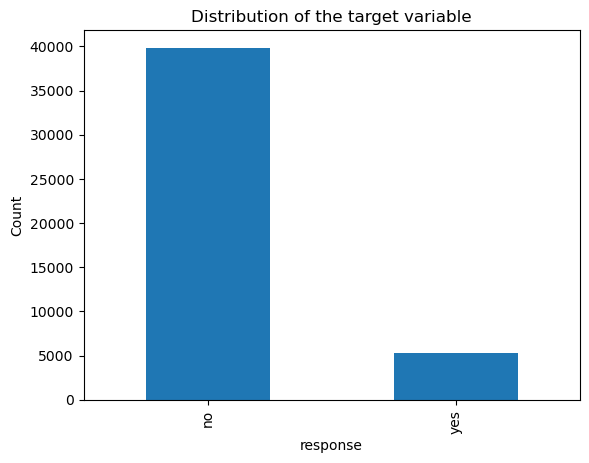

In [55]:
counts.plot(kind='bar')

# Add title and labels
plt.title('Distribution of the target variable')
plt.xlabel('response')
plt.ylabel('Count')

In [54]:
counts


response
no     39832
yes     5279
Name: count, dtype: int64

Text(0.5, 1.0, 'Pie Chart for response')

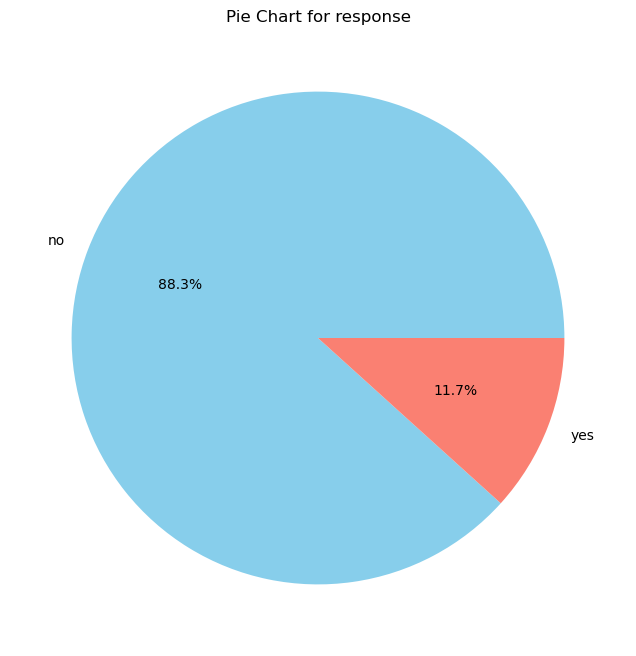

In [80]:
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title('Pie Chart for response')

"88% of the people who were contacted as part of the campaign did not express interest in investing in a term deposit."

Text(0.5, 1.0, 'Pie Chart for response')

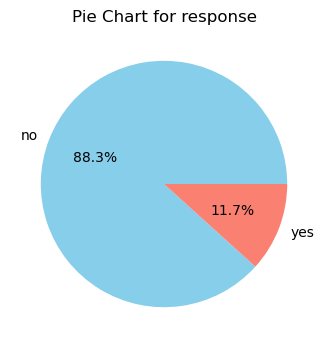

In [11]:
plt.figure(figsize=(4, 4))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title('Pie Chart for response')

** most of the responses are no**

**Univariate Analysis of age, balance, and call duration.**

In [58]:
summary_stats = df3[['age', 'balance', 'duration']].describe()
print(summary_stats)

                age        balance
count  45111.000000   45111.000000
mean      40.938352    1362.539647
std       10.619601    3046.016714
min       18.000000   -8019.000000
25%       33.000000      72.000000
50%       39.000000     448.000000
75%       48.000000    1428.000000
max       95.000000  102127.000000


In [141]:

df4 = df3[['age', 'balance', 'duration']]



for i in df4:
    plt.figure(figsize=(3,3))
    sns.histplot(df4[i], bins=5, kde=True)
    plt.show()

**AGE**

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


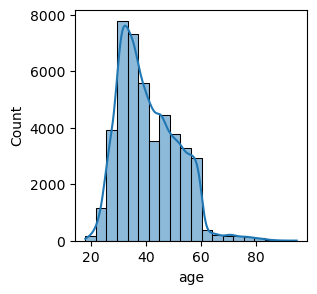

In [90]:
plt.figure(figsize=(3,3))
sns.histplot(df4['age'], bins=20, kde=True)
plt.show()

In [93]:
plt.figure(figsize=(3,3))
sns.boxplot(y='age',data=df4)
plt.show()

The age distribution suggests that the majority of individuals contacted were in the age range of 30-50 years.with outilers being the 70 and above of age people.mean being 41 years .18 being the youngest and 95 being the oldest.

**Balance**

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


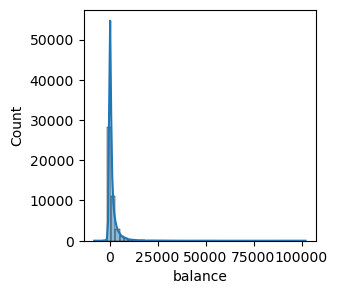

In [105]:
plt.figure(figsize=(3,3))
sns.histplot(df4['balance'], bins=50, kde=True)
plt.show()

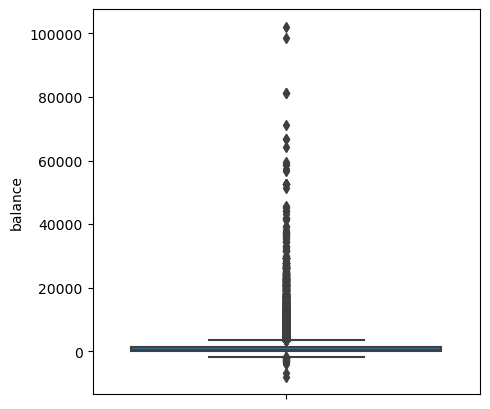

In [110]:
plt.figure(figsize=(5,5))
sns.boxplot(y='balance',data=df4)
plt.show()


"The balance distribution indicates that most individuals who was contacted had account balances below 5000 with 1362 mean and 3640 with standard deviation a significant concentration around the lower end ."

**Duration**

In [40]:
def convert_duration(duration):
    # Check if the unit is in seconds or minutes and handle accordingly
    if 'sec' in duration:
        # Remove ' sec' and convert to float, then to int
        return int(float(duration.replace(' sec', '')))
    elif 'min' in duration:
        # Remove ' min' and convert to float, then to int (after converting to seconds)
        return int(float(duration.replace(' min', '')) * 60)
    else:
        return 0 

In [37]:
df3_c

customerid   age  salary  balance   marital                  jobedu  \
0               1  58.0  100000     2143   married     management,tertiary   
1               2  44.0   60000       29    single    technician,secondary   
2               3  33.0  120000        2   married  entrepreneur,secondary   
3               4  47.0   20000     1506   married     blue-collar,unknown   
4               5  33.0       0        1    single         unknown,unknown   
...           ...   ...     ...      ...       ...                     ...   
45206       45207  51.0   60000      825   married     technician,tertiary   
45207       45208  71.0   55000     1729  divorced         retired,primary   
45208       45209  72.0   55000     5715   married       retired,secondary   
45209       45210  57.0   20000      668   married   blue-collar,secondary   
45210       45211  37.0  120000     2971   married  entrepreneur,secondary   

      targeted default housing loan  ... day      month              duration  \
0          yes      no     yes   no  ...   5  may, 2017               261 sec   
1          yes      no     yes   no  ...   5  may, 2017               151 sec   
2          yes      no     yes  yes  ...   5  may, 2017                76 sec   
3           no      no     yes   no  ...   5  may, 2017                92 sec   
4           no      no      no   no  ...   5  may, 2017               198 sec   
...        ...     ...     ...  ...  ...  ..        ...                   ...   
45206      yes      no      no   no  ...  17  nov, 2017  16.2833333333333 min   
45207      yes      no      no   no  ...  17  nov, 2017               7.6 min   
45208      yes      no      no   no  ...  17  nov, 2017  18.7833333333333 min   
45209      yes      no      no   no  ...  17  nov, 2017  8.46666666666667 min   
45210      yes      no      no   no  ...  17  nov, 2017  6.01666666666667 min   

      campaign  pdays  previous  poutcome response           job  education  
0            1     -1         0   unknown       no    management   tertiary  
1            1     -1         0   unknown       no    technician  secondary  
2            1     -1         0   unknown       no  entrepreneur  secondary  
3            1     -1         0   unknown       no   blue-collar    unknown  
4            1     -1         0   unknown       no       unknown    unknown  
...        ...    ...       ...       ...      ...           ...        ...  
45206        3     -1         0   unknown      yes    technician   tertiary  
45207        2     -1         0   unknown      yes       retired    primary  
45208        5    184         3   success      yes       retired  secondary  
45209        4     -1         0   unknown       no   blue-collar  secondary  
45210        2    188        11     other       no  entrepreneur  secondary  

[45111 rows x 21 columns]

In [ ]:
# Apply the conversion function
df3['duration'] = df3['duration'].apply(convert_duration)

# Display the cleaned DataFrame
print(df3)

In [43]:
df3

customerid   age  salary  balance   marital                  jobedu  \
0               1  58.0  100000     2143   married     management,tertiary   
1               2  44.0   60000       29    single    technician,secondary   
2               3  33.0  120000        2   married  entrepreneur,secondary   
3               4  47.0   20000     1506   married     blue-collar,unknown   
4               5  33.0       0        1    single         unknown,unknown   
...           ...   ...     ...      ...       ...                     ...   
45206       45207  51.0   60000      825   married     technician,tertiary   
45207       45208  71.0   55000     1729  divorced         retired,primary   
45208       45209  72.0   55000     5715   married       retired,secondary   
45209       45210  57.0   20000      668   married   blue-collar,secondary   
45210       45211  37.0  120000     2971   married  entrepreneur,secondary   

      targeted default housing loan    contact  day      month  duration  \
0          yes      no     yes   no    unknown    5  may, 2017       261   
1          yes      no     yes   no    unknown    5  may, 2017       151   
2          yes      no     yes  yes    unknown    5  may, 2017        76   
3           no      no     yes   no    unknown    5  may, 2017        92   
4           no      no      no   no    unknown    5  may, 2017       198   
...        ...     ...     ...  ...        ...  ...        ...       ...   
45206      yes      no      no   no   cellular   17  nov, 2017       976   
45207      yes      no      no   no   cellular   17  nov, 2017       456   
45208      yes      no      no   no   cellular   17  nov, 2017      1126   
45209      yes      no      no   no  telephone   17  nov, 2017       508   
45210      yes      no      no   no   cellular   17  nov, 2017       361   

       campaign  pdays  previous poutcome response  
0             1     -1         0  unknown       no  
1             1     -1         0  unknown       no  
2             1     -1         0  unknown       no  
3             1     -1         0  unknown       no  
4             1     -1         0  unknown       no  
...         ...    ...       ...      ...      ...  
45206         3     -1         0  unknown      yes  
45207         2     -1         0  unknown      yes  
45208         5    184         3  success      yes  
45209         4     -1         0  unknown       no  
45210         2    188        11    other       no  

[45111 rows x 19 columns]

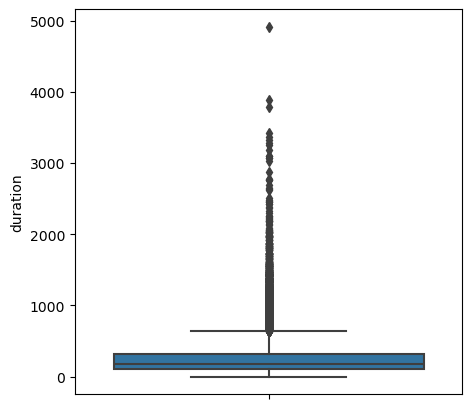

In [143]:
plt.figure(figsize=(5,5))
sns.boxplot(y='duration',data=df3)
plt.show()

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


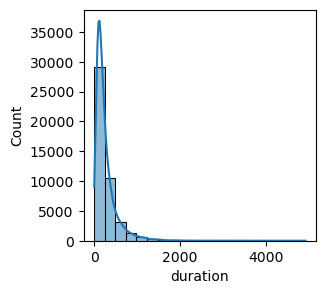

In [44]:
plt.figure(figsize=(3,3))
sns.histplot(df3['duration'], bins=20, kde=True)
plt.show()

In [11]:
df4['duration'].describe()

count    45111.000000
mean       257.928953
std        257.498530
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

**The mean duration of call is less than 5 min with 75% call with around 5 min.that means most of the calls were short.outliers are with duration more than 10.7 min**

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


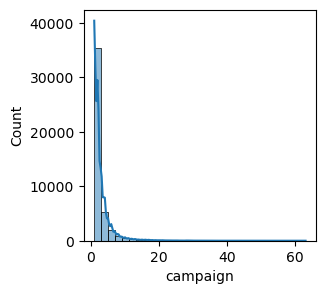

In [18]:
plt.figure(figsize=(3,3))
sns.histplot(df3['campaign'], bins=30, kde=True)
plt.show()

In [ ]:
**Most of the customers were contacted around 5 times.**

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


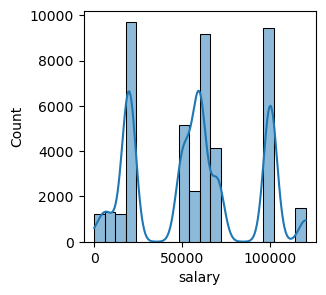

In [14]:
plt.figure(figsize=(3,3))
sns.histplot(df3['salary'], bins=20, kde=True)
plt.show()

most of the customers contacted had high salaries more than 50000.

 **"The correlation between numerical variables"**

In [33]:
# Filter numeric columns in the dataset
numeric_columns = df3.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix for numeric variables
correlation_matrix = df3[numeric_columns].corr()


In [34]:
# Display the correlation matrix
print("Correlation Matrix:\n", correlation_matrix)


Correlation Matrix:
             customerid       age    salary   balance       day  campaign  \
customerid    1.000000  0.014827  0.039755  0.073364 -0.061726 -0.102765   
age           0.014827  1.000000  0.024558  0.097802 -0.009014  0.004595   
salary        0.039755  0.024558  1.000000  0.055207  0.027894  0.015058   
balance       0.073364  0.097802  0.055207  1.000000  0.004731 -0.014273   
day          -0.061726 -0.009014  0.027894  0.004731  1.000000  0.162644   
campaign     -0.102765  0.004595  0.015058 -0.014273  0.162644  1.000000   
pdays         0.437645 -0.023867 -0.015189  0.003620 -0.093124 -0.088534   
previous      0.270922  0.001315  0.014525  0.016791 -0.051723 -0.032729   

               pdays  previous  
customerid  0.437645  0.270922  
age        -0.023867  0.001315  
salary     -0.015189  0.014525  
balance     0.003620  0.016791  
day        -0.093124 -0.051723  
campaign   -0.088534 -0.032729  
pdays       1.000000  0.454147  
previous    0.454147  1.000000

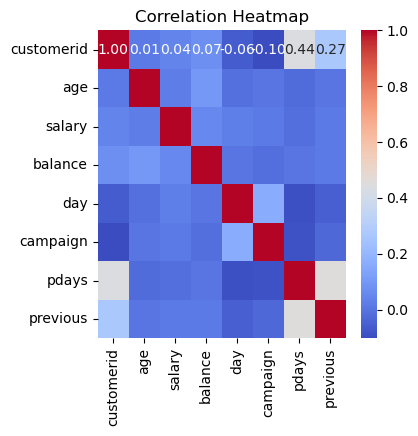

In [35]:
# Plot the correlation heatmap
plt.figure(figsize=(4, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


There is no significant multicollinearity among the variables.

**the scatter plot for relation ship between age and responce**

In [ ]:
plt.figure(figsize=(16,6)

<Axes: xlabel='age', ylabel='response'>

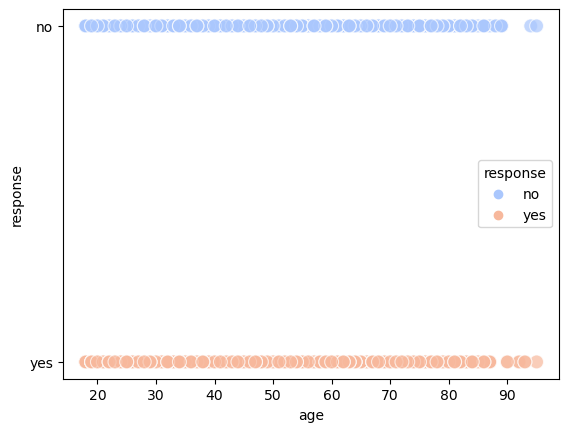

In [14]:
sns.scatterplot(x='age', y='response', data=df3, alpha=0.7, hue='response', palette='coolwarm', s=100)


there is significant sucessful responce from people above 90

<Axes: xlabel='response', ylabel='age'>

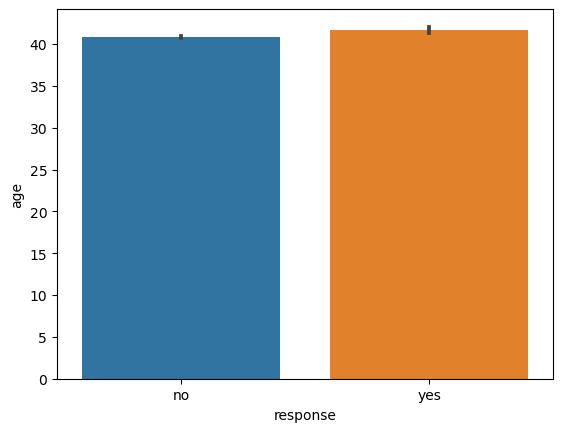

In [15]:
sns.barplot(x='response' ,y='age',data=df3)


elderly people responded more

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


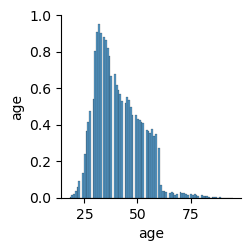

In [19]:
sns.pairplot(df3[['jobedu','marital','contact','response','age']])


Peaks appear in the 30–50 age range, indicating higher interest in the term deposit campaign among middle-aged customers.
There is a smaller yet notable density among customers aged 60 and above, suggesting retirees or older individuals may also find term deposits appealing.

In [47]:
df3[['job', 'education']] = df3['jobedu'].str.split(',', expand=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_15568\132898645.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3[['job', 'education']] = df3['jobedu'].str.split(',', expand=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_15568\132898645.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3[['job', 'education']] = df3['jobedu'].str.split(',', expand=True)


Responce by marital status

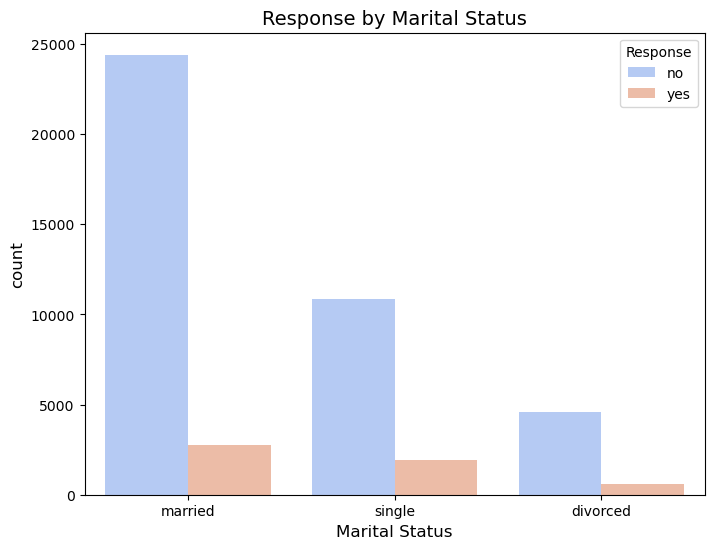

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(data=df3, x='marital', hue='response', palette='coolwarm')
plt.title('Response by Marital Status', fontsize=14)
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('count', fontsize=12)
plt.legend(title='Response')
plt.show()

married customer has less yes response .
singles responded more positively as compared to married and divorced.
divorced individuals have smallest representation but show a balanced response rate.

**Responce by job**

In [151]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(13, 13))
sns.countplot(data=df3_c, x='job', hue='response', palette='coolwarm')
plt.title('Response by job', fontsize=14)
plt.xlabel('job', fontsize=12)
plt.ylabel('count', fontsize=12)
plt.legend(title='Response')
plt.show()

Management and Technician :have a higher proportion of positive ("Yes") responses
Blue-Collar and Unknown Jobs and students :higher percentage of negative ("No") responses.
Entrepreneurs and Retired Individuals:show moderate interest in term deposits.
Unemployed Individuals:leans more toward negative responses

In [166]:
sns.boxplot(x='response', y='age', data=df3)


<Axes: xlabel='response', ylabel='age'>

Customers with a "Yes" response tend to have a slightly broader age distribution, with a higher median age compared to those with a "No" response

In [167]:
sns.boxplot(x='response', y='salary', data=df3)


<Axes: xlabel='response', ylabel='salary'>

**"Yes" responses are more common in customers with higher salaries**

In [168]:
sns.boxplot(x='response', y='balance', data=df3)


<Axes: xlabel='response', ylabel='balance'>

In [169]:
sns.boxplot(x='response', y='duration', data=df3)


<Axes: xlabel='response', ylabel='duration'>

 **call duration was more in case of positive responce**

In [171]:
sns.boxplot(x='response', y='campaign', data=df3)


<Axes: xlabel='response', ylabel='campaign'>

**success rate by job **

In [28]:
job_response_percentage = df3_c[df3_c['response'] == 'yes'].groupby('job').size() / df3_c.groupby('job').size() * 100


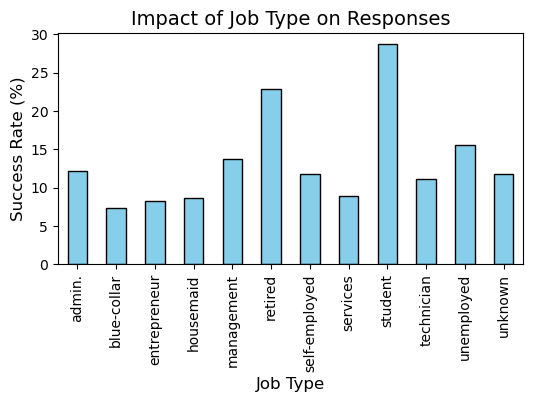

In [30]:
plt.figure(figsize=(6, 3))
job_response_percentage.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Impact of Job Type on Responses', fontsize=14)
plt.xlabel('Job Type', fontsize=12)
plt.ylabel('Success Rate (%)', fontsize=12)

plt.show()

**students and retired had large success rate.blue collor has least success rate**

**success rate by marital status**

In [32]:
marital_response_percentage = df3[df3['response'] == 'yes'].groupby('marital').size() / df3.groupby('marital').size() * 100


In [37]:
plt.figure(figsize=(6, 6))
marital_response_percentage.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Impact of marital status on Responses', fontsize=14)
plt.xlabel('marital', fontsize=12)
plt.ylabel('Success Rate (%)', fontsize=12)

plt.show()

**singles have high success rate followed by divorced and married**

**Impact of Education on responce**

In [34]:
edu_response_percentage = df3[df3['response'] == 'yes'].groupby('education').size() / df3.groupby('education').size() * 100


In [35]:
plt.figure(figsize=(12, 6))
edu_response_percentage.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Impact of education on Responses', fontsize=14)
plt.xlabel('education', fontsize=12)
plt.ylabel('Success Rate (%)', fontsize=12)

plt.show()

**People with Tertiary education has the highest success rate.whereas primary has lowest success rate.**

** Distribution of Job type,Education and marital status **

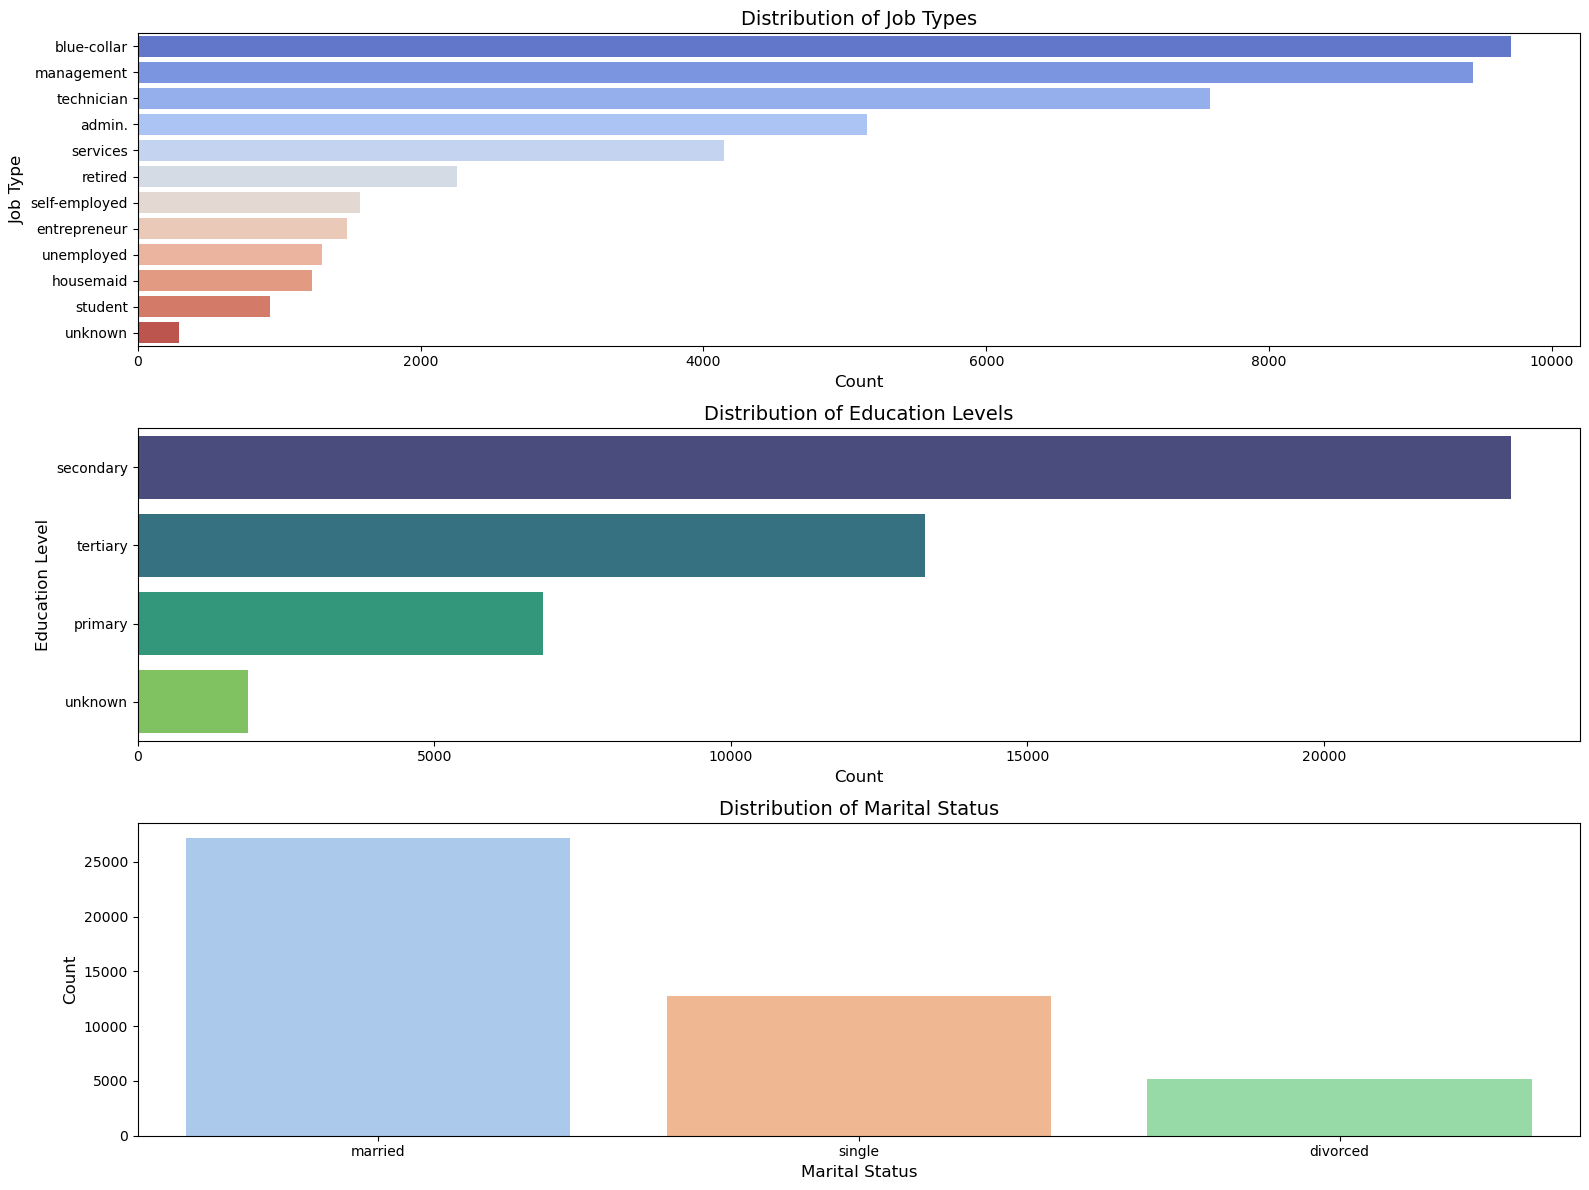

In [38]:
plt.figure(figsize=(16, 12))

# Plot the distribution of job types
plt.subplot(3, 1, 1)
sns.countplot(data=df3, y='job', order=df3['job'].value_counts().index, palette='coolwarm')
plt.title('Distribution of Job Types', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Job Type', fontsize=12)

# Plot the distribution of education levels
plt.subplot(3, 1, 2)
sns.countplot(data=df3, y='education', order=df3['education'].value_counts().index, palette='viridis')
plt.title('Distribution of Education Levels', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Education Level', fontsize=12)

# Plot the distribution of marital status
plt.subplot(3, 1, 3)
sns.countplot(data=df3, x='marital', palette='pastel')
plt.title('Distribution of Marital Status', fontsize=14)
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.tight_layout()
plt.show()

**The married people ,people with secondary education level and people with blue collar jobs were among the most contacted.**

**TEMPORAL ANALYSIS**

In [45]:
# Extract the month and calculate success rates
df3['month_n'] = df3['month'].str.split(',').str[0].str.strip()
monthly_success_rate = df3[df3['response'] == 'yes'].groupby('month_n').size() / df3.groupby('month_n').size() * 100


C:\Users\Admin\AppData\Local\Temp\ipykernel_15568\4183857834.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['month_n'] = df3['month'].str.split(',').str[0].str.strip()


In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract the month and calculate success rates
df3['month_n'] = df3['month'].str.split(',').str[0].str.strip()
monthly_success_rate = df3[df3['response'] == 'yes'].groupby('month_n').size() / df3.groupby('month_n').size() * 100

# Plot the success rates for each year
plt.figure(figsize=(10, 6))
monthly_success_rate.plot(kind='bar', color='purple', edgecolor='black')
plt.title('Success Rates by month', fontsize=16)
plt.xlabel('month', fontsize=12)
plt.ylabel('Success Rate (%)', fontsize=12)

plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_1924\2493871381.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['month_n'] = df3['month'].str.split(',').str[0].str.strip()


**Campaign was most successful in March and least successful in May.**

In [50]:
df3.describe()

customerid           age         salary        balance           day  \
count  45111.000000  45111.000000   45111.000000   45111.000000  45111.000000   
mean   22610.660349     40.938352   57005.785729    1362.539647     15.808118   
std    13048.080128     10.619601   32090.324851    3046.016714      8.323389   
min        1.000000     18.000000       0.000000   -8019.000000      1.000000   
25%    11312.500000     33.000000   20000.000000      72.000000      8.000000   
50%    22613.000000     39.000000   60000.000000     448.000000     16.000000   
75%    33908.500000     48.000000   70000.000000    1428.000000     21.000000   
max    45211.000000     95.000000  120000.000000  102127.000000     31.000000   

           duration      campaign         pdays      previous     year  
count  45111.000000  45111.000000  45111.000000  45111.000000  45111.0  
mean     257.928953      2.762541     40.193323      0.580391   2017.0  
std      257.498530      3.093698    100.094574      2.304710      0.0  
min        0.000000      1.000000     -1.000000      0.000000   2017.0  
25%      103.000000      1.000000     -1.000000      0.000000   2017.0  
50%      180.000000      2.000000     -1.000000      0.000000   2017.0  
75%      319.000000      3.000000     -1.000000      0.000000   2017.0  
max     4918.000000     63.000000    871.000000    275.000000   2017.0

In [52]:
daily_success_rate = df3[df3['response'] == 'yes'].groupby('day').size() / df3.groupby('day').size() * 100

# Plot the success rates for each year
plt.figure(figsize=(10, 6))
daily_success_rate.plot(kind='bar', color='green', edgecolor='black')
plt.title('Success Rates by days', fontsize=16)
plt.xlabel('day', fontsize=12)
plt.ylabel('Success Rate (%)', fontsize=12)

plt.show()


**1st day of every month has highest success rate**

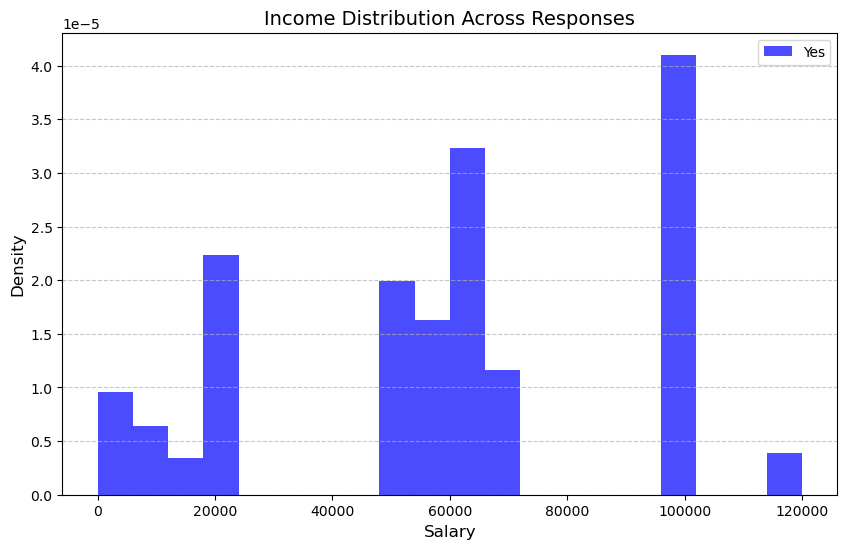

In [55]:
# Plot income distribution for each response category
response_yes = df3[df3['response'] == 'yes']
plt.figure(figsize=(10, 6))
plt.hist(response_yes['salary'], bins=20, alpha=0.7, label='Yes', density=True, color='blue')
plt.title('Income Distribution Across Responses', fontsize=14)
plt.xlabel('Salary', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Most people responded as yes were with salary  greater than  1L . and least number of people responding to the campaign were  having salary less than 25000

**Grouping of income and age**

C:\Users\Admin\AppData\Local\Temp\ipykernel_1924\3158956848.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['age_group'] = pd.cut(df3['age'], bins=age_bins, labels=age_labels, right=False)
C:\Users\Admin\AppData\Local\Temp\ipykernel_1924\3158956848.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_response_counts = df3.groupby(['age_group', 'response']).size().unstack(fill_value=0)


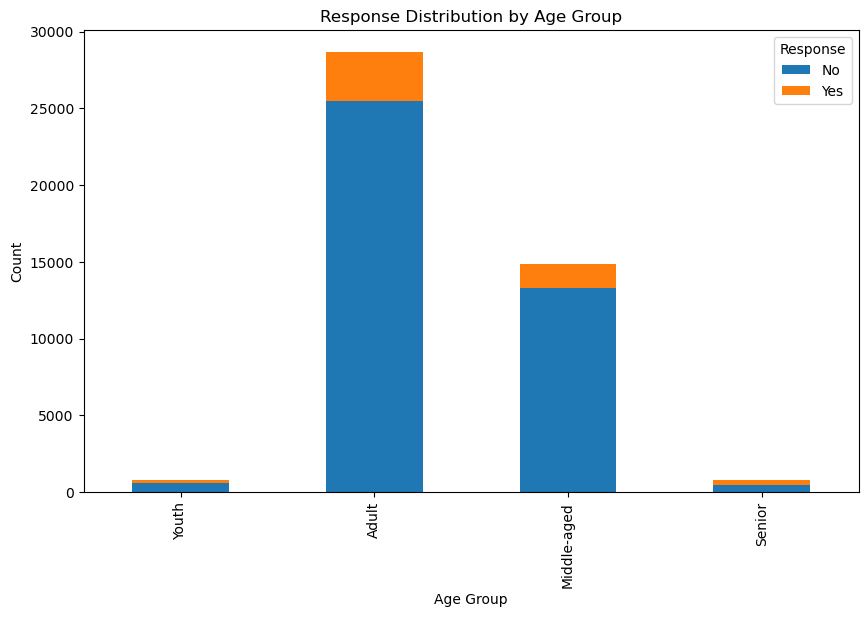

In [57]:
# Group ages into predefined categories
age_bins = [0, 25, 45, 65, 100]
age_labels = ['Youth', 'Adult', 'Middle-aged', 'Senior']
df3['age_group'] = pd.cut(df3['age'], bins=age_bins, labels=age_labels, right=False)

# Group by age group and response, then calculate counts
age_response_counts = df3.groupby(['age_group', 'response']).size().unstack(fill_value=0)

# Plot the responses by age group
age_response_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Response Distribution by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.legend(title="Response", labels=["No", "Yes"], loc="upper right")
plt.show()


In [59]:
# Define bins and labels for income categories
bins_salary = [0, 20000, 50000, 100000, float('inf')]  # Salary ranges for categorization
labels_salary = ['Low', 'Medium', 'High', 'Very High']

# Create a new column 'income_category' by categorizing the 'salary' column
df3['income_category'] = pd.cut(df3['salary'], bins=bins_salary, labels=labels_salary, right=False)

C:\Users\Admin\AppData\Local\Temp\ipykernel_1924\89061401.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['income_category'] = pd.cut(df3['salary'], bins=bins_salary, labels=labels_salary, right=False)


C:\Users\Admin\AppData\Local\Temp\ipykernel_1924\237284208.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_response_counts = df3.groupby(['income_category', 'response']).size().unstack(fill_value=0)


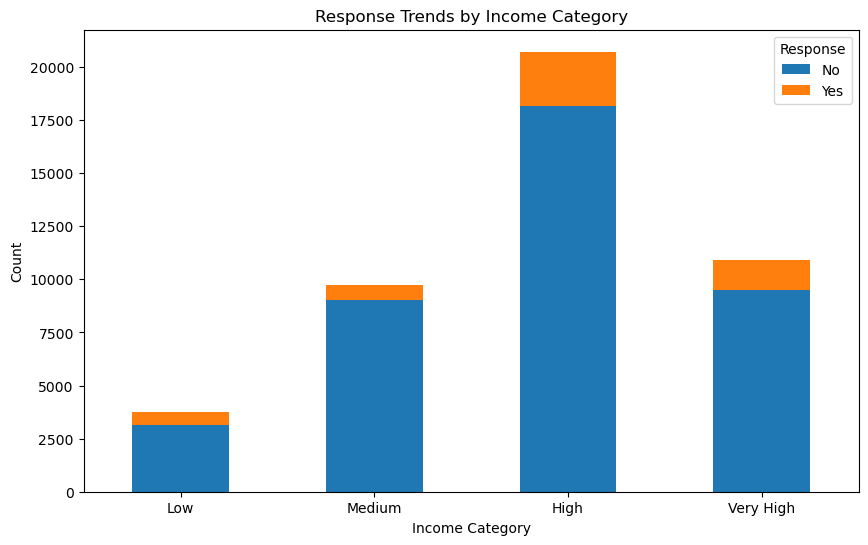

In [61]:
# Group by income category and response, then calculate counts
income_response_counts = df3.groupby(['income_category', 'response']).size().unstack(fill_value=0)

# Plot the responses by income category
income_response_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Response Trends by Income Category")
plt.xlabel("Income Category")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.legend(title="Response", labels=["No", "Yes"], loc="upper right")
plt.show()

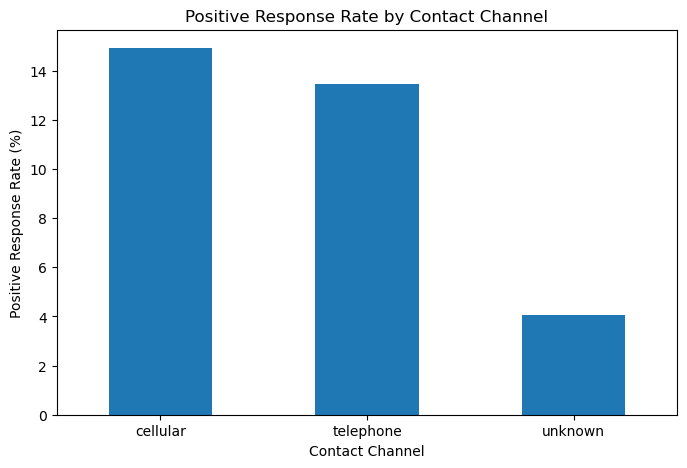

response         no       yes  positive_rate
contact                                     
cellular   0.850828  0.149172      14.917203
telephone  0.865564  0.134436      13.443640
unknown    0.959251  0.040749       4.074873

In [89]:
# Analyze campaign performance by contact channels
response_by_contact = df3.groupby('contact')['response'].value_counts(normalize=True).unstack()

# Calculate positive response rate (%) for each contact channel
response_by_contact['positive_rate'] = response_by_contact['yes'] * 100

# Plotting response rates by contact channel
response_by_contact['positive_rate'].plot(kind='bar', figsize=(8, 5), title="Positive Response Rate by Contact Channel")
plt.ylabel('Positive Response Rate (%)')
plt.xlabel('Contact Channel')
plt.xticks(rotation=0)
plt.show()

response_by_contact


most successful mode of contact is Cellular 

**Encoding and outlier treatment**

In [ ]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df3.select_dtypes(include= 'object'):
    df3[i]=le.fit_transform(df3[i])

In [71]:
df_num1=df3.select_dtypes(include=np.number)
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
df_norm=scale.fit_transform(df_num1)

df_norm=pd.DataFrame(df_norm)

In [72]:
#standardization
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df_std=sc.fit_transform(df_num1)

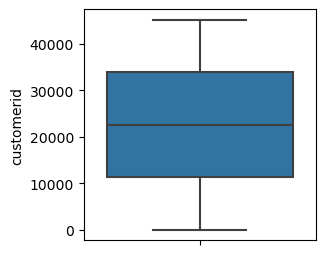

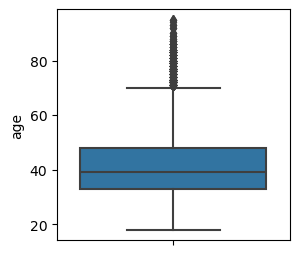

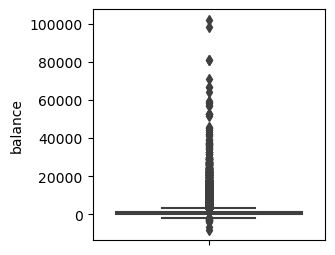

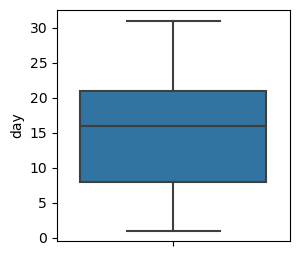

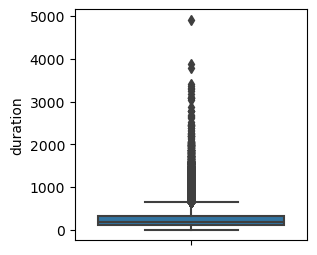

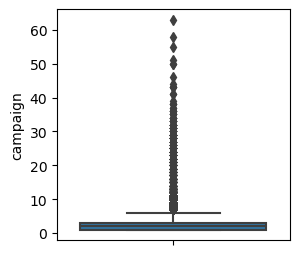

In [73]:
for i in df_num1:
    plt.figure(figsize=(3,3))
    sns.boxplot(y=i,data=df_num1)
    plt.show()

In [74]:
def outlier_treatment(df_num1,column):
    q1=df_num1[column].quantile(.25)
    q3=df_num1[column].quantile(.75)
    iqr=q3-q1
    lower_limit=q1-(1.5*iqr)
    upper_limit=q3+(1.5*iqr)
    filtered_data=df_num1[(df_num1[column]>=lower_limit)&(df_num1[column]<=upper_limit)]
    return filtered_data

In [75]:
Columns=df_num1.columns

In [77]:
#Using function for df_num Outlier Removing

df_filtered=outlier_treatment(df_num1,Columns)

In [78]:
df_filtered.dropna(inplace=True)

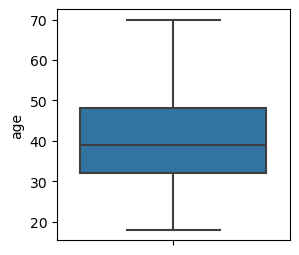

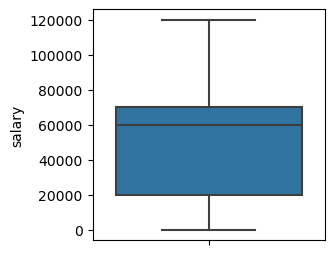

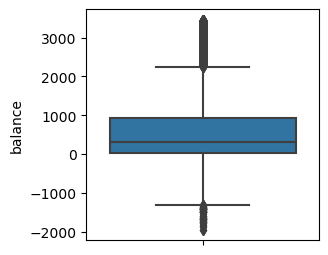

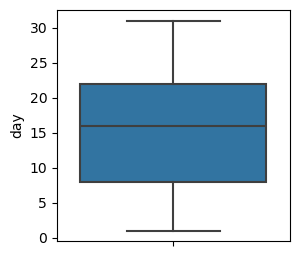

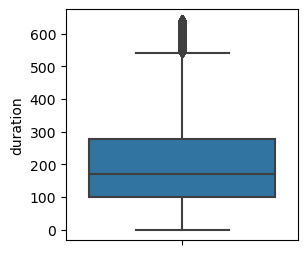

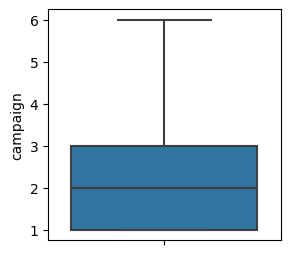

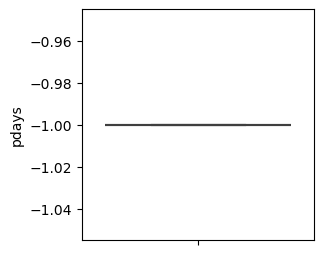

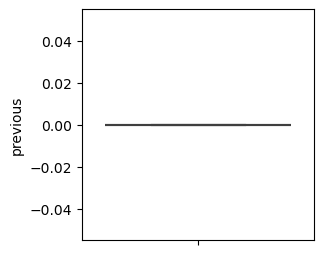

In [79]:
for i in df_filtered:
    plt.figure(figsize=(3,3))
    sns.boxplot(y=i,data=df_filtered)
    plt.show()

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

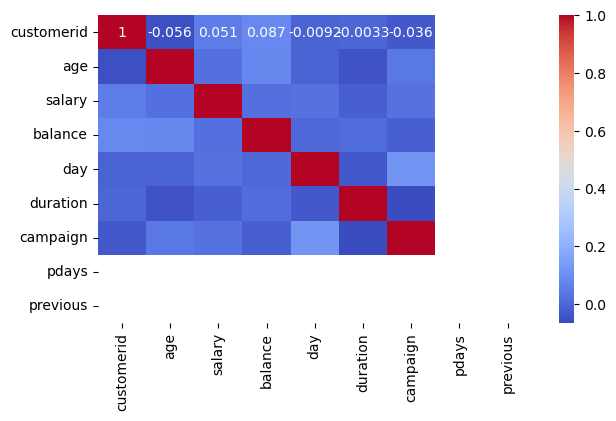

In [87]:
plt.figure(figsize=(7,4))
sns.heatmap(df_filtered.corr(),annot=True,cmap='coolwarm')

In [ ]:
**no significant multicollinearity among the variables after outlier treatment**